In [1]:
from main import clarans, gen_data, plot_results, preprocess_data, test_generated_data_simple, test_real_world_data, test_generated_data_dimensions
import matplotlib.pyplot as plt
import numpy as np

# Przykładowe działanie algorytmu na danych generowanych

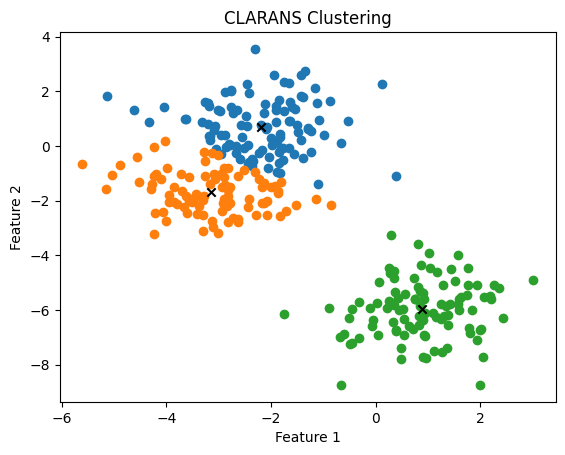

In [79]:
num_clusters: int = 3
num_local: int = 5
max_neighbor: int = 10
num_samples: int = 300

data = gen_data(num_samples, num_clusters, num_local, max_neighbor, uniform=False)

clusters = clarans(data, num_clusters, num_local, max_neighbor)

plot_results(clusters)

# Przykładowe działanie algorytmu na danych rzeczywistych


Testing on real-world dataset: banana.arff
Preprocessing Time (banana.arff): 0.0130 seconds
CLARANS Time (banana.arff): 11.1890 seconds


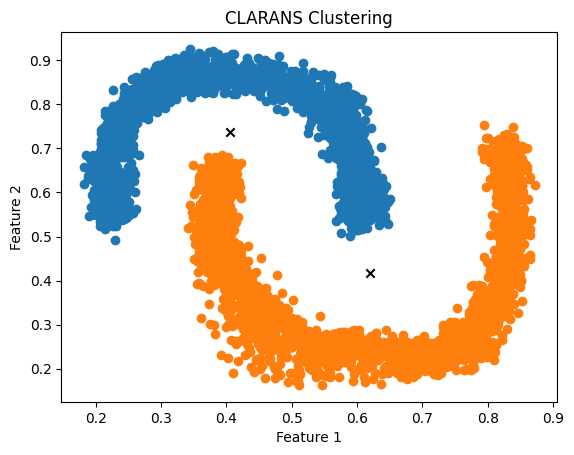

In [83]:
dataset_name = "banana.arff"
num_clusters: int = 2
num_local: int = 5
max_neighbor: int = 10

result, prep_time, clarans_time = test_real_world_data(num_local, max_neighbor, dataset_name, num_clusters)
plot_results(result)

# Poniżej znadjują się komórki które posłużyły do testowania algorytmu i generowania wykresów

In [4]:
results_num_clusters={}
results_num_local={}
results_max_neighbor={}

In [1]:
num_local: int = 5
max_neighbor: int = 10
# n_samples_list = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
n_samples_list = [6400]

for num_clusters in range(10, 11):
    print(f"Testing num_clusters: {num_clusters}")
    results_rand, results_blobs = test_generated_data_simple(num_clusters, num_local, max_neighbor, n_samples_list)
    results_num_clusters[num_clusters] = results_rand, results_blobs
    
num_clusters = 3
max_neighbor: int = 10
for num_local in range(2, 16):
    print(f"Testing num_local: {num_local}")
    results_rand, results_blobs = test_generated_data_simple(num_clusters, num_local, max_neighbor, n_samples_list)
    results_num_local[num_local] = results_rand, results_blobs

num_clusters = 3   
num_local: int = 5
for max_neighbor in range(5, 21):
    print(f"Testing max_neighbor: {max_neighbor}")
    results_rand, results_blobs = test_generated_data_simple(num_clusters, num_local, max_neighbor, n_samples_list)
    results_max_neighbor[max_neighbor] = results_rand, results_blobs

Testing num_clusters: 10


NameError: name 'test_generated_data_simple' is not defined

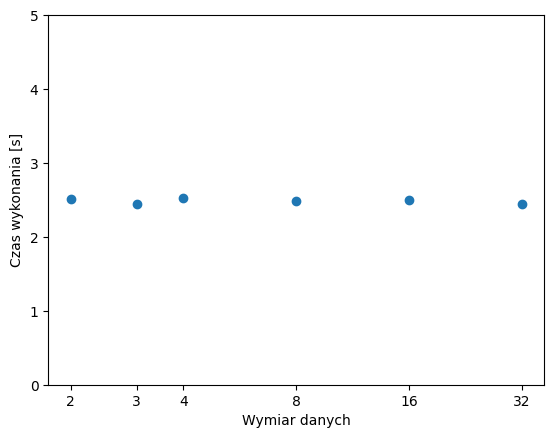

In [14]:
#results_rand = np.array(results_size[0])

# Plotting
keys_dim = np.array([int(k) for k in dim_results.keys()])
values_dim = np.array([v for v in dim_results.values()])

plt.scatter(keys_dim, values_dim)
plt.ylim(0, 5)
plt.xscale('log', base=2)
plt.xticks(keys_dim, labels=[str(i) for i in keys_dim])
# Add labels and title
plt.xlabel('Wymiar danych')
plt.ylabel('Czas wykonania [s]')

# Show the plot
plt.show()

In [13]:
results_size = None

In [34]:
num_clusters = 3   
max_neighbor: int = 10
num_local: int = 5
print(f"Testing size")
results_rand, results_blobs = test_generated_data_simple(num_clusters, num_local, max_neighbor, [200])
results_size[0][200] = results_rand[200]
results_size[1][200] = results_blobs[200]

Testing size


In [36]:
results_size[0]

{100: [0.0009953975677490234, 0.197998046875],
 400: [0.0009982585906982422, 0.7380082607269287],
 800: [0.0020046234130859375, 1.9040262699127197],
 1600: [0.0029997825622558594, 3.635564088821411],
 3200: [0.005999326705932617, 7.991425275802612],
 6400: [0.012999773025512695, 15.942468166351318],
 12800: [0.03300786018371582, 34.696799993515015],
 25600: [0.049997806549072266, 52.93253564834595],
 200: [0.0009996891021728516, 0.46686434745788574]}

In [37]:
import json

with open('results/results_num_clusters.json', 'w') as f:
    json.dump(results_num_clusters, f)
    
with open('results/results_num_local.json', 'w') as f:
    json.dump(results_num_local, f)

with open('results/results_max_neighbor.json', 'w') as f:
    json.dump(results_max_neighbor, f)
    
with open('results/results_size_rand.json', 'w') as f:
    json.dump(results_size[0], f)
    
with open('results/results_size_blobs.json', 'w') as f:
    json.dump(results_size[1], f)

In [15]:
with open('results/results_num_clusters.json', 'r') as f:
    results_num_clusters_read = json.load(f)

with open('results/results_num_local.json', 'r') as f:
    results_num_local_read = json.load(f)
    
with open('results/results_max_neighbor.json', 'r') as f:
    results_max_neighbor_read = json.load(f)
    
with open('results/results_size_rand.json', 'r') as f:
    results_size_rand_read = json.load(f)
    
with open('results/results_size_blobs.json', 'r') as f:
    results_size_blobs_read = json.load(f)

In [20]:
results_num_clusters_read

{'2': [{'6400': [0.011989593505859375, 8.818236827850342]},
  {'6400': [0.01300811767578125, 8.72030782699585]}],
 '3': [{'6400': [0.012987136840820312, 14.26920199394226]},
  {'6400': [0.011996984481811523, 14.86557388305664]}],
 '4': [{'6400': [0.013004541397094727, 28.08526349067688]},
  {'6400': [0.012998580932617188, 18.14046359062195]}],
 '5': [{'6400': [0.011996984481811523, 22.05239748954773]},
  {'6400': [0.012990474700927734, 35.293259382247925]}],
 '6': [{'6400': [0.011998653411865234, 46.40227770805359]},
  {'6400': [0.011983871459960938, 37.54438495635986]}],
 '7': [{'6400': [0.012000560760498047, 51.7954638004303]},
  {'6400': [0.012997627258300781, 43.60309958457947]}],
 '8': [{'6400': [0.013004302978515625, 46.79478454589844]},
  {'6400': [0.012998104095458984, 68.88071584701538]}],
 '9': [{'6400': [0.011997222900390625, 64.89428925514221]},
  {'6400': [0.012994527816772461, 80.07395434379578]}],
 '10': [{'6400': [0.013008356094360352, 102.0935127735138]},
  {'6400': [0

In [77]:
keys_rand = np.array([int(k) for k in results_max_neighbor_read.keys()])
values_rand = np.array([v[0]['6400'][0] for v in results_max_neighbor_read.values()])

keys_blobs = np.array([int(k) for k in results_max_neighbor_read.keys()])
values_blobs = np.array([v[1]['6400'][0] for v in results_max_neighbor_read.values()])

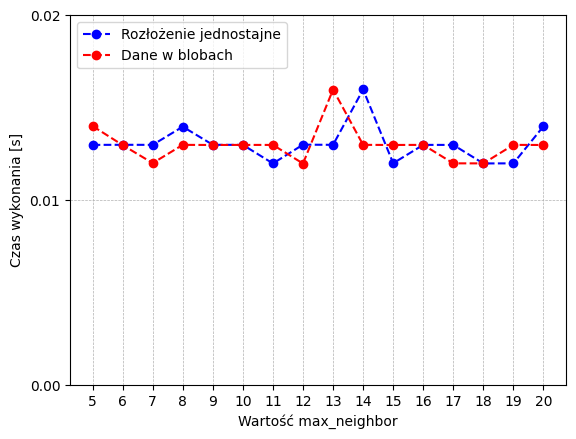

In [78]:
# Plotting
fig, ax = plt.subplots()

# Set logarithmic scale for x-axis
#ax.set_xscale('log')
#ax.set_yscale('log')

# Plot data
ax.plot(keys_rand, values_rand, marker='o', linestyle='--', color='blue', label='Rozłożenie jednostajne')
ax.plot(keys_blobs, values_blobs, marker='o', linestyle='--', color='red', label='Dane w blobach')

# Set labels
ax.set_xlabel('Wartość max_neighbor')
ax.set_ylabel('Czas wykonania [s]')

# Set limits
#ax.set_xlim([80, 30000])
#ax.set_ylim([0, 60])

# Set ticks
ax.set_xticks(keys_blobs)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
#ax.set_yticks(np.arange(0, 50, 10))
ax.set_yticks(np.arange(0, 0.03,0.01))

# Enable grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
ax.legend(loc='upper left')

# Show plot
plt.show()


Testing on real-world dataset: donut1.arff
Preprocessing Time (donut1.arff): 0.0030 seconds
CLARANS Time (donut1.arff): 1.3460 seconds


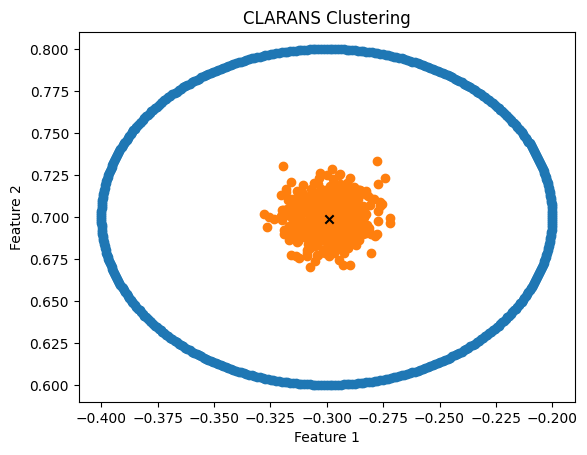

In [19]:
|}res, _, _ = test_real_world_data(10, 5, "donut1.arff", 2)
plot_results(res)